# 1. 필요한 패키지 import 하기

In [1]:
import os 
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import dlib 
print("🌫🛸")

🌫🛸


# 2. 내 이미지 불러오기

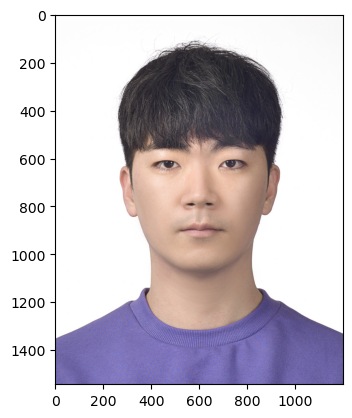

In [2]:
my_image_path = 'images/my_image.png'
img_bgr = cv2.imread(my_image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 3. detector 선언 & bounding box 추출 & 찾은 얼굴을 출력

- **dlib의 face detector**: HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾습니다.
- **HOG(Histogram of Oriented Gradients)**: 이미지 내 픽셀의 밝기 변화 방향을 계산하여 객체의 형태를 포착하고, 이걸 최종 특징벡터로 산출하는 알고리즘이다. 산출된 특징벡터는 SVM과 같은 머신러닝 모델에 입력되어, 객체 분류에 활용된다. 

rectangles[[(280, 428) (946, 1094)]]


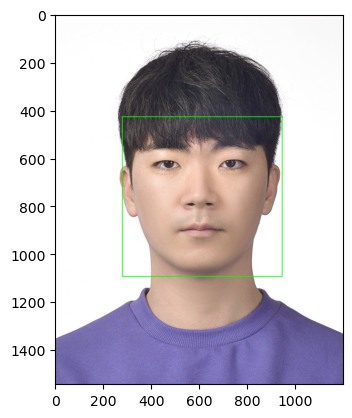

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left()   # left
    t = dlib_rect.top()    # top
    r = dlib_rect.right()  # right
    b = dlib_rect.bottom() # bottom

    cv2.rectangle(img_rgb, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_rgb)
plt.show()

# 4. Dlib Face Landmark Localization & 찾은 Landmark 출력

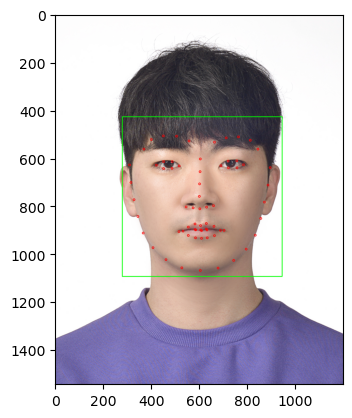

In [4]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb, point, 4, (255, 0, 0), 2)

plt.imshow(img_rgb)
plt.show()

# 5. 스티커 적용하기

(603, 812)
(x,y) : (603,812)
(w,h) : (667,667)
(667, 667, 3)
(x,y) : (270,459)


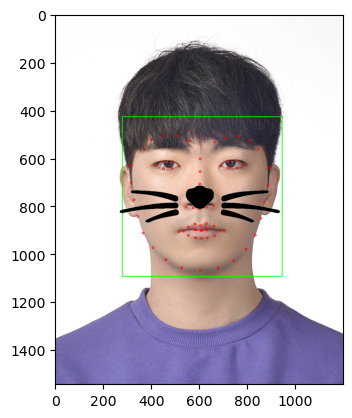

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
    print (landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

sticker_path = 'images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x - w // 2 
refined_y = y - h // 2 - 20

print (f'(x,y) : ({refined_x},{refined_y})')

sticker_area = img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rgb[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(img_rgb)
plt.show()

# 6. 최종 결과 출력하기

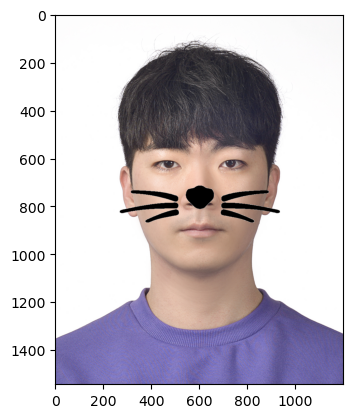

In [6]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

---

# 7. 테스트 이미지 불러오기

[01] (1024, 1024, 3) 
[02] (1024, 1024, 3) 
[03] (1024, 1024, 3) 
[04] (1024, 1536, 3) 
[05] (1024, 1024, 3) 
[06] (1024, 1024, 3) 
[07] (1024, 1024, 3) 
[08] (1024, 1024, 3) 
[09] (1024, 1024, 3) 
[10] (1024, 1024, 3) 
[11] (1536, 1024, 3) 
[12] (887, 592, 3) → (1534, 1024, 3)

[13] (545, 819, 3) → (1024, 1538, 3)

[14] (427, 640, 3) → (1024, 1534, 3)

[15] (784, 1040, 3) → (1024, 1358, 3)



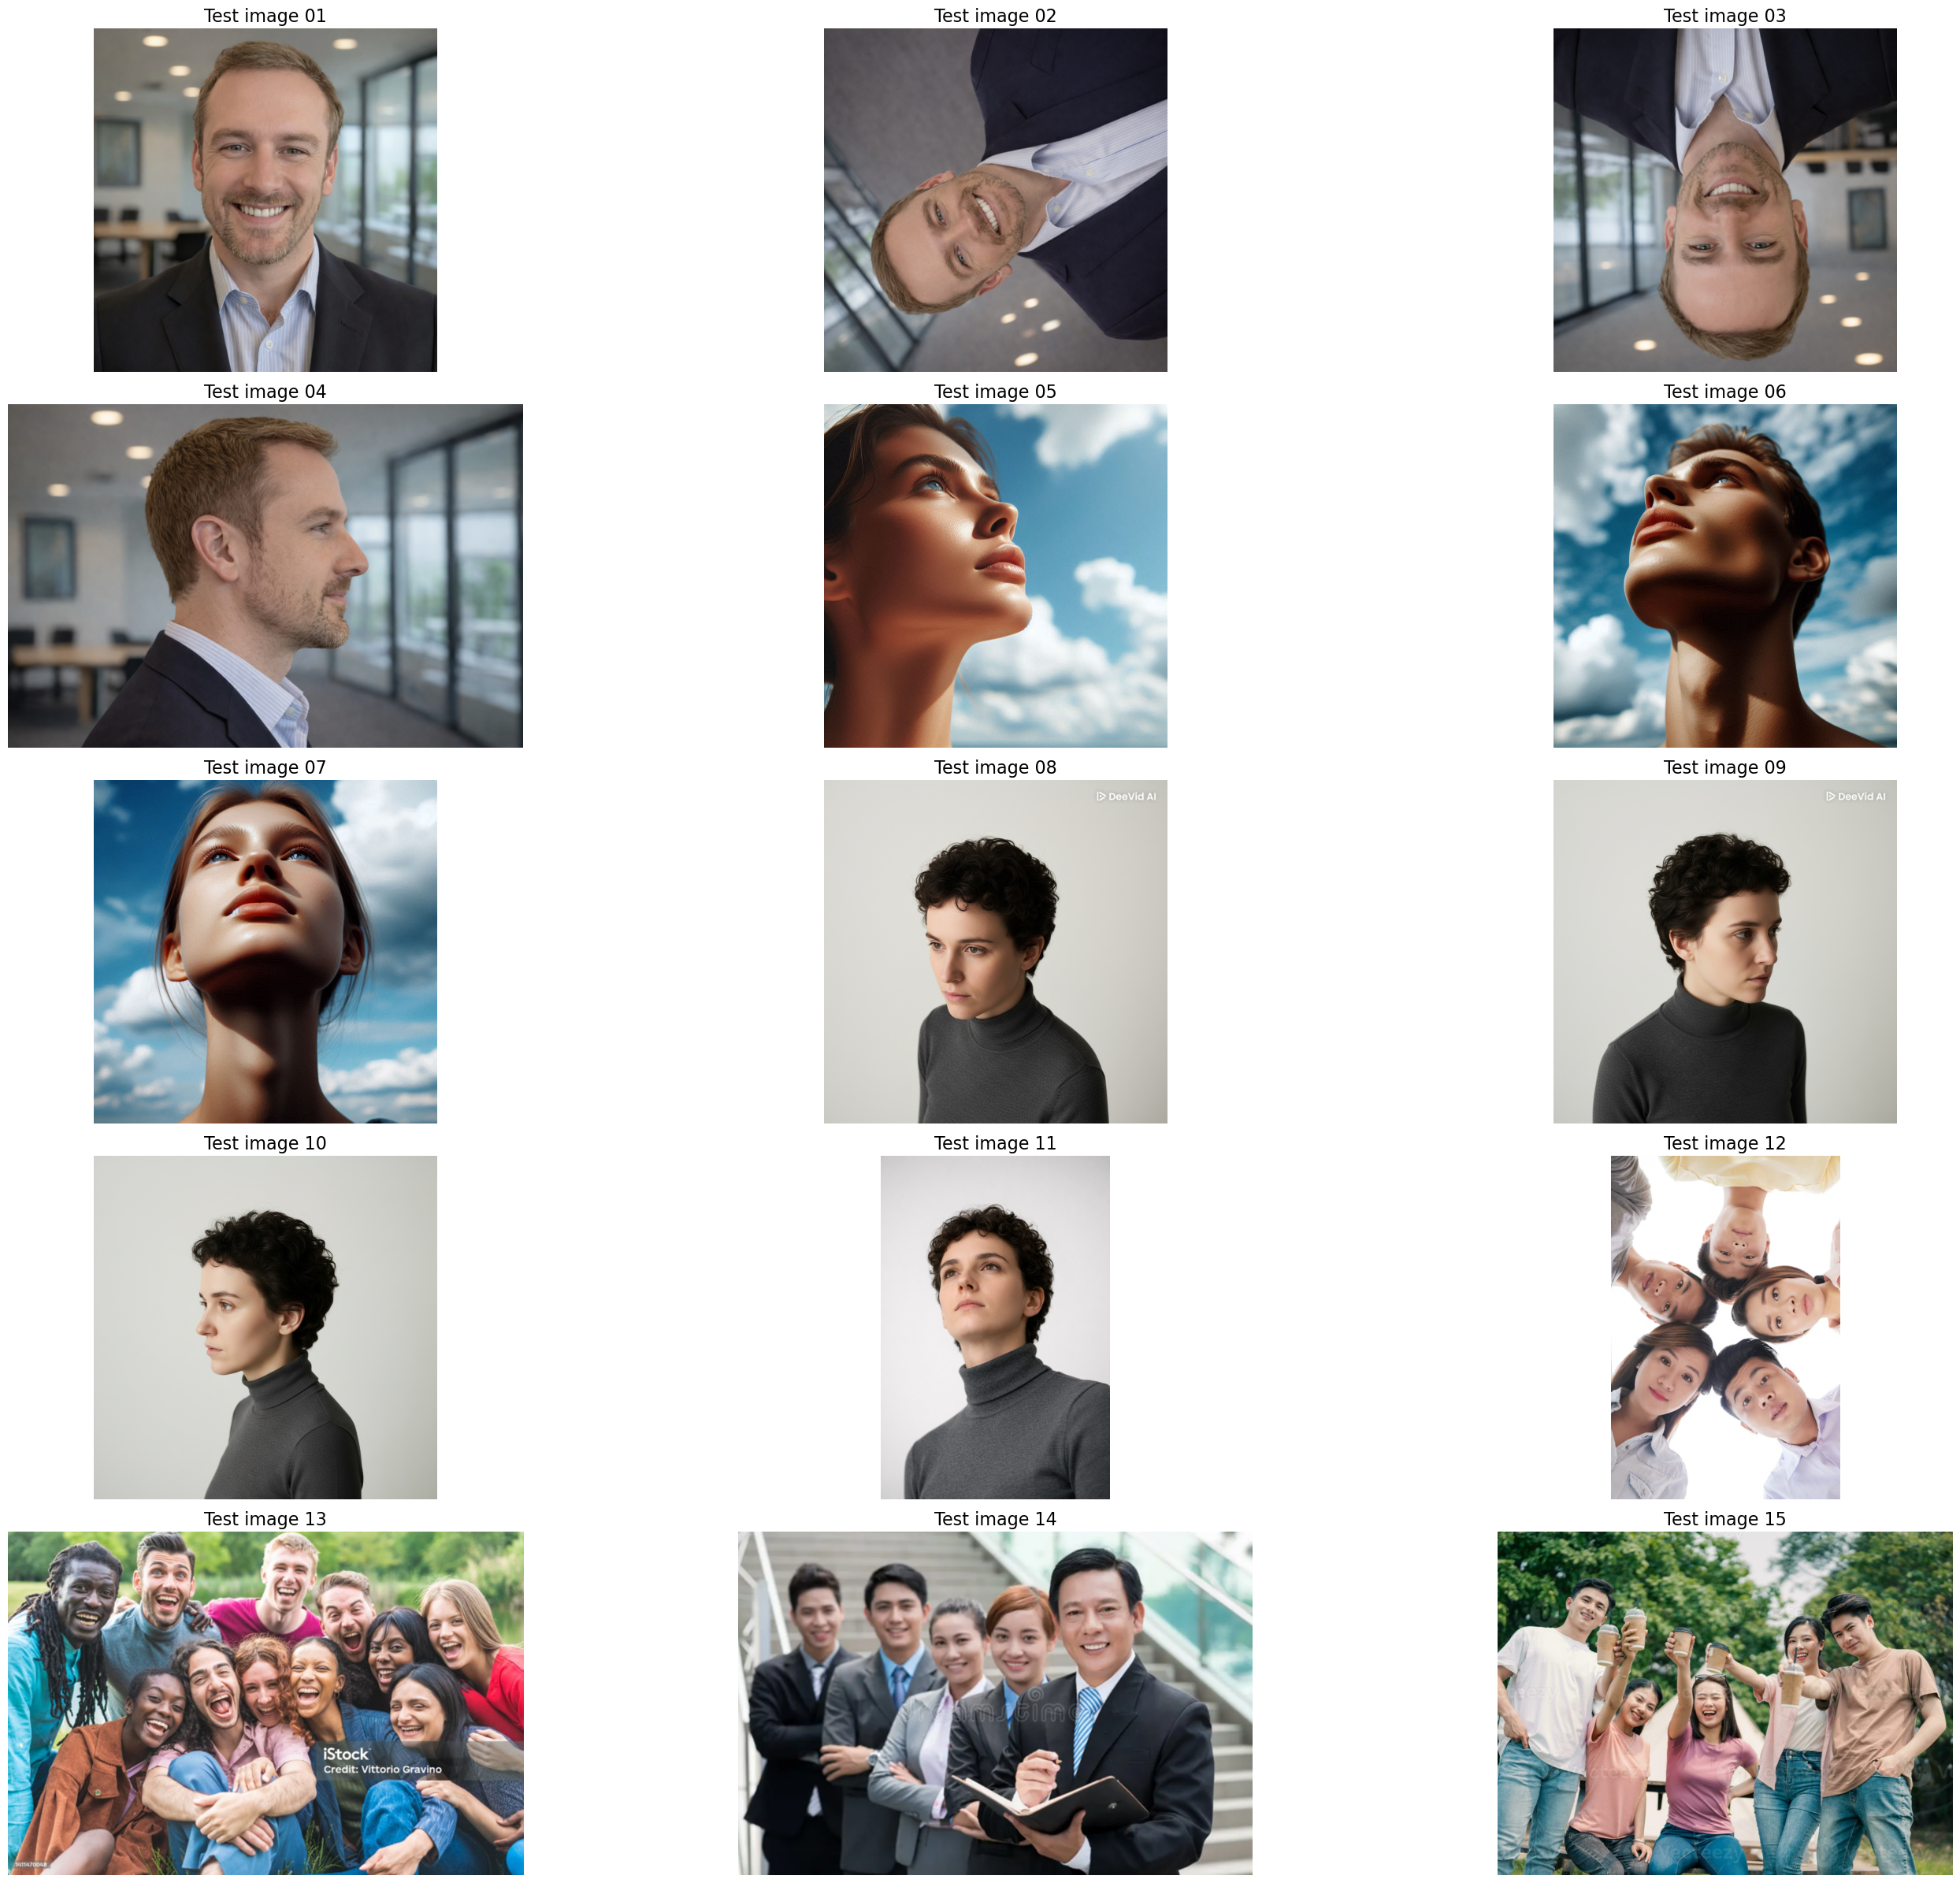

In [7]:
test_img_list = []
test_img_list_show = []
for i in range(1,16):
    test_img_path = f'test_images/Test_img_{i:02d}.png'
    img_bgr = cv2.imread(test_img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(f"[{i:02d}] {img_rgb.shape}", end = ' ')

    # 이미지 사이즈가 작은 경우 resize로 늘리기
    if img_rgb.shape[0] + img_rgb.shape[1] < 2000: 
        if img_rgb.shape[0] / img_rgb.shape[1] < 1:
            img_rgb = cv2.resize(img_rgb, (int(1024*(img_rgb.shape[1]/img_rgb.shape[0])), 1024))
            img_bgr = cv2.resize(img_bgr, (int(1024*(img_bgr.shape[1]/img_bgr.shape[0])), 1024))
        else:
            img_rgb = cv2.resize(img_rgb, (1024, int(1024*(img_rgb.shape[0]/img_rgb.shape[1]))))
            img_bgr = cv2.resize(img_bgr, (1024, int(1024*(img_bgr.shape[0]/img_bgr.shape[1]))))
        print(f"→ {img_rgb.shape}")
    print()

    test_img_list.append(img_rgb)
    test_img_list_show.append(img_bgr)

fig, axes = plt.subplots(5, 3, figsize=(30, 24))
axes = axes.flatten()
for i, ax, img in zip(range(1, 16), axes, test_img_list):
    ax.imshow(img)
    ax.set_title(f'Test image {i:02d}', fontsize=16)
    ax.axis('off')
plt.tight_layout()
plt.show()

# 8. 스티커 붙이는 함수 정의하기

In [8]:
def sticker(img, img_show):
    print("[Start]")
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img, 1)

    print(dlib_rects)
    
    for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
        l = dlib_rect.left()     # Left
        t = dlib_rect.top()      # Top
        r = dlib_rect.right()    # Right
        b = dlib_rect.bottom()   # Bottom

        cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    model_path = 'models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []

    print("[Start] Landmark Localization")
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img, point, 4, (255, 0, 0), 2)

    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
        print("[Start] Sticker Matching")
        print (f"Landmark[33] Point: {landmark[33]}")
        x = landmark[33][0]
        y = landmark[33][1]
        w = h = dlib_rect.width() 
        print (f'rect width (w,h): ({w},{h})')

        dx = landmark[14][0] - landmark[2][0]
        dy = landmark[14][1] - landmark[2][1]
        angle = -np.degrees(np.arctan2(dy, dx))
        print(f"angle: {angle}")

        sticker_path = 'images/cat-whiskers.png'
        img_sticker = cv2.imread(sticker_path) 
        img_sticker = cv2.resize(img_sticker, (w,h))
        
        h = img_sticker.shape[0]
        w = img_sticker.shape[1]
        center = (w//2, h//2)

        radians = np.deg2rad(angle)
        cos = np.abs(np.cos(radians))
        sin = np.abs(np.sin(radians))
        new_w = int((h * sin) + (w * cos))
        new_h = int((h * cos) + (w * sin))

        dim = max(new_w, new_h)

        M = cv2.getRotationMatrix2D(center, angle, 1)
        M[0, 2] += (dim - w) / 2
        M[1, 2] += (dim - h) / 2

        rotated_sticker = cv2.warpAffine(img_sticker, M, (dim, dim), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

        refined_x = x - rotated_sticker.shape[1] // 2
        refined_y = y - rotated_sticker.shape[0] // 2

        refined_x = max(0, min(refined_x, img_bgr.shape[1] - rotated_sticker.shape[1]))
        refined_y = max(0, min(refined_y, img_bgr.shape[0] - rotated_sticker.shape[0]))
        print (f'refined (x,y): ({refined_x},{refined_y})')

        sticker_area = img[refined_y:refined_y +rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]
        img[refined_y:refined_y +rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = np.where(rotated_sticker==255,sticker_area,rotated_sticker).astype(np.uint8)
        
        sticker_area = img_show[refined_y:refined_y +rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]
        img_show[refined_y:refined_y +rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = np.where(rotated_sticker==255,sticker_area,rotated_sticker).astype(np.uint8)

    fig, axes = plt.subplots(1, 2)
    axes = axes.flatten()
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

[Start]
rectangles[[(332, 247) (718, 632)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (505, 500)
rect width (w,h): (387,387)
angle: -3.119300342112424
refined (x,y): (302,297)


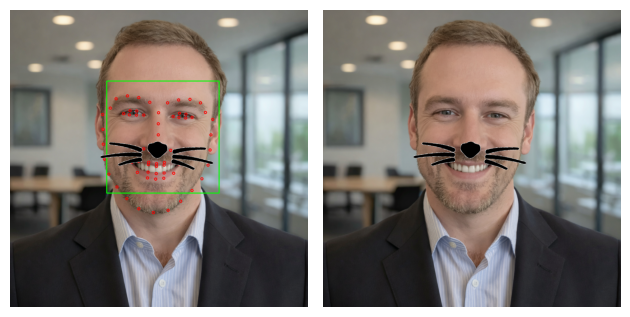

[Start]
rectangles[]
[Start] Landmark Localization


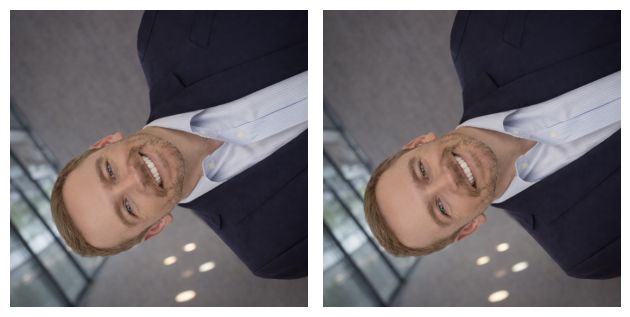

[Start]
rectangles[]
[Start] Landmark Localization


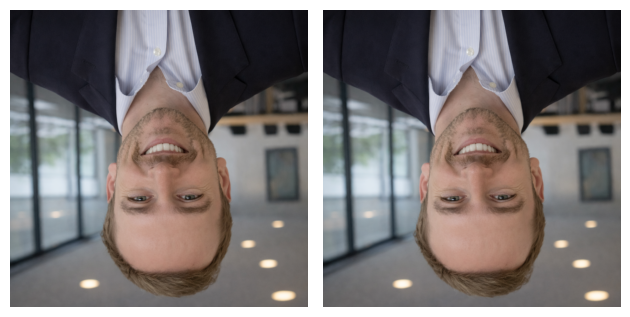

[Start]
rectangles[[(759, 194) (1221, 657)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (1050, 465)
rect width (w,h): (463,463)
angle: 17.896132925039247
refined (x,y): (759,174)


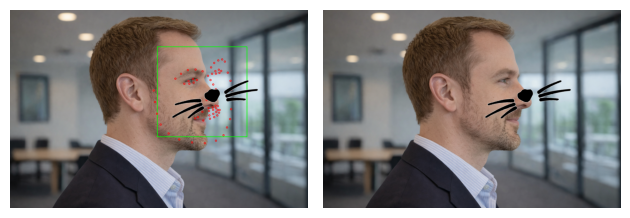

[Start]
rectangles[]
[Start] Landmark Localization


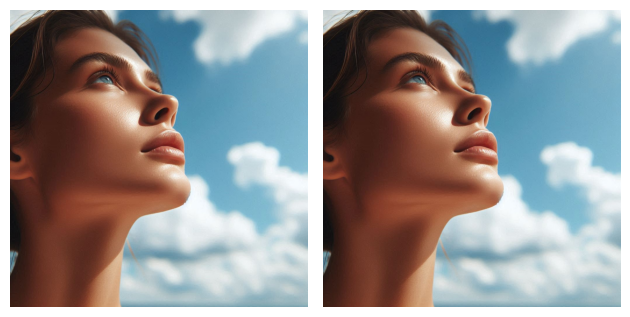

[Start]
rectangles[]
[Start] Landmark Localization


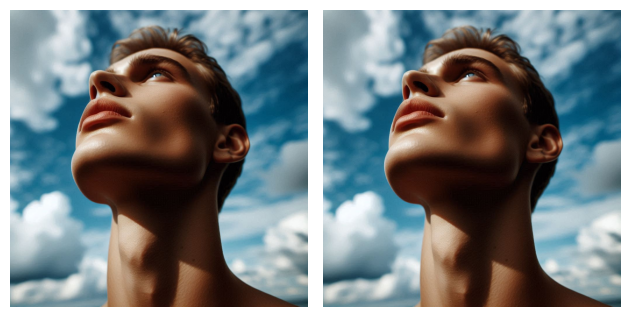

[Start]
rectangles[]
[Start] Landmark Localization


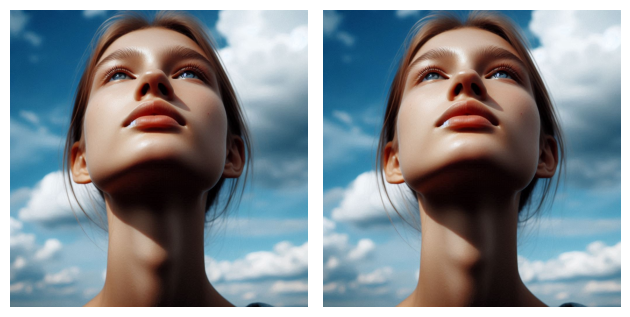

[Start]
rectangles[[(241, 384) (562, 705)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (368, 607)
rect width (w,h): (322,322)
angle: -9.141640223524895
refined (x,y): (184,423)


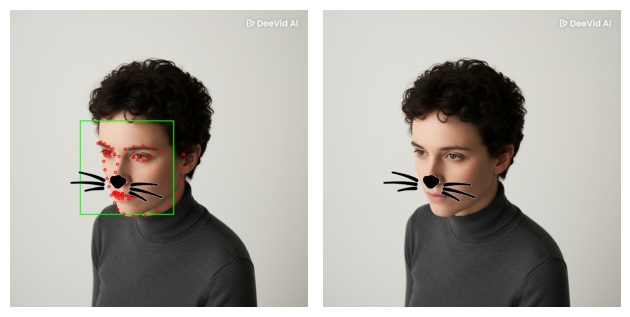

[Start]
rectangles[[(468, 379) (735, 647)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (638, 557)
rect width (w,h): (268,268)
angle: 3.6214847041173397
refined (x,y): (496,415)


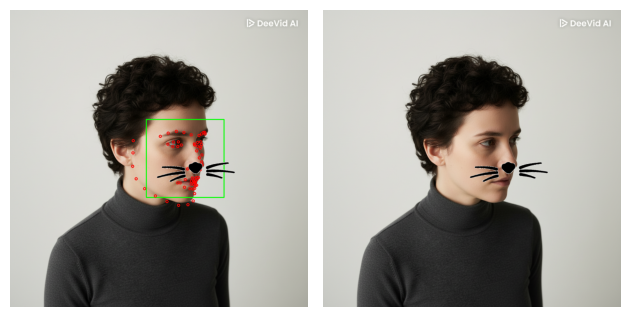

[Start]
rectangles[[(230, 350) (498, 617)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (326, 537)
rect width (w,h): (269,269)
angle: -14.462452882171352
refined (x,y): (163,374)


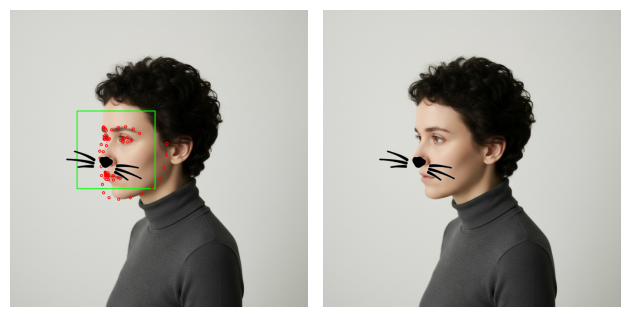

[Start]
rectangles[[(204, 376) (589, 761)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (378, 607)
rect width (w,h): (386,386)
angle: -3.9038957005487203
refined (x,y): (173,402)


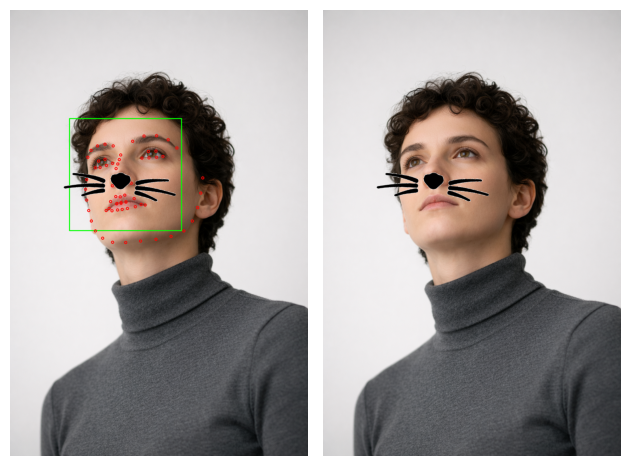

[Start]
rectangles[[(98, 848) (419, 1169)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (236, 1043)
rect width (w,h): (322,322)
angle: -33.9234502658317
refined (x,y): (13,578)


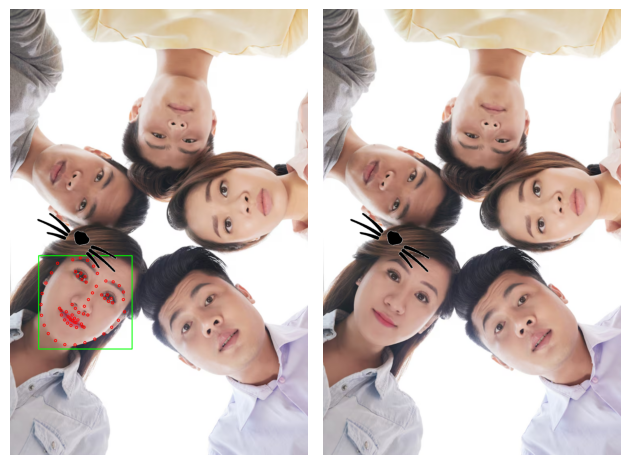

[Start]
rectangles[[(531, 366) (716, 552)], [(820, 356) (975, 511)], [(1109, 449) (1294, 634)], [(386, 77) (572, 263)], [(1044, 288) (1199, 442)], [(769, 82) (898, 211)], [(373, 460) (528, 614)], [(1233, 236) (1388, 391)], [(142, 93) (365, 316)], [(923, 180) (1109, 366)], [(698, 426) (827, 555)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (629, 478)
rect width (w,h): (186,186)
angle: 20.820892853310824
refined (x,y): (510,359)
[Start] Sticker Matching
Landmark[33] Point: (890, 450)
rect width (w,h): (156,156)
angle: -7.125016348901798
refined (x,y): (803,363)
[Start] Sticker Matching
Landmark[33] Point: (1177, 572)
rect width (w,h): (186,186)
angle: -4.616352093551013
refined (x,y): (1077,472)
[Start] Sticker Matching
Landmark[33] Point: (483, 178)
rect width (w,h): (187,187)
angle: -4.279463530245225
refined (x,y): (383,78)
[Start] Sticker Matching
Landmark[33] Point: (1116, 393)
rect width (w,h): (156,156)
angle: -1.263672551658268
refined (x,y): (1037

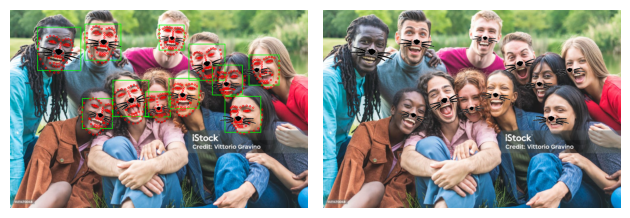

[Start]
rectangles[[(914, 142) (1181, 409)], [(390, 184) (545, 339)], [(737, 263) (923, 449)], [(551, 263) (737, 449)], [(167, 202) (322, 356)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (1054, 311)
rect width (w,h): (268,268)
angle: 3.460183228986457
refined (x,y): (913,170)
[Start] Sticker Matching
Landmark[33] Point: (470, 276)
rect width (w,h): (156,156)
angle: 3.2245226065199075
refined (x,y): (388,194)
[Start] Sticker Matching
Landmark[33] Point: (822, 378)
rect width (w,h): (187,187)
angle: -3.2601606378748773
refined (x,y): (724,280)
[Start] Sticker Matching
Landmark[33] Point: (639, 385)
rect width (w,h): (187,187)
angle: 5.031934222829206
refined (x,y): (538,284)
[Start] Sticker Matching
Landmark[33] Point: (244, 287)
rect width (w,h): (156,156)
angle: 6.193904967150984
refined (x,y): (159,202)


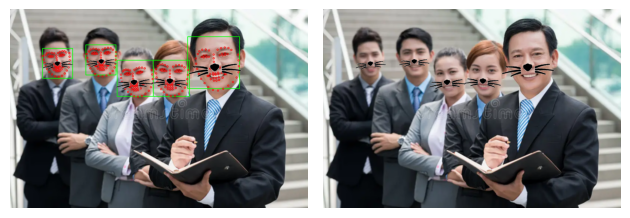

[Start]
rectangles[[(581, 462) (689, 570)], [(384, 484) (474, 574)], [(844, 283) (951, 390)], [(223, 187) (330, 295)], [(1001, 275) (1091, 365)]]
[Start] Landmark Localization
[Start] Sticker Matching
Landmark[33] Point: (629, 524)
rect width (w,h): (109,109)
angle: -0.0
refined (x,y): (575,470)
[Start] Sticker Matching
Landmark[33] Point: (425, 540)
rect width (w,h): (91,91)
angle: -32.27564431457763
refined (x,y): (363,478)
[Start] Sticker Matching
Landmark[33] Point: (899, 354)
rect width (w,h): (108,108)
angle: 3.7313969991604465
refined (x,y): (842,297)
[Start] Sticker Matching
Landmark[33] Point: (275, 241)
rect width (w,h): (108,108)
angle: -23.902050411010848
refined (x,y): (204,170)
[Start] Sticker Matching
Landmark[33] Point: (1049, 330)
rect width (w,h): (91,91)
angle: 30.211322385834826
refined (x,y): (987,268)


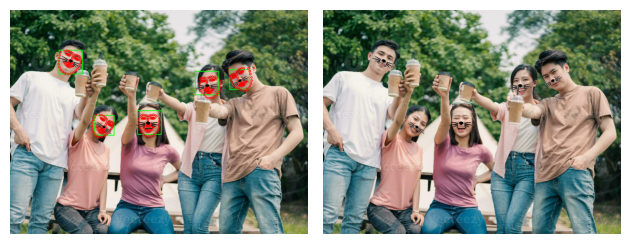

In [9]:
for img, img_show in zip(test_img_list, test_img_list_show):
    sticker(img, img_show)